#### Prepare

In [1]:
# Import packages
library("phyloseq")
library("cluster")
library("ggplot2")

In [2]:
# Import data
data(enterotype)
pseq <- enterotype

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,AM.AD.1,AM.AD.2,AM.F10.T1,AM.F10.T2,DA.AD.1,DA.AD.1T,DA.AD.2,DA.AD.3,DA.AD.3T,DA.AD.4,⋯,TS9_V2,TS90_V2,TS91_V2,TS92_V2,TS94_V2,TS95_V2,TS96_V2,TS97_V2,TS98_V2,TS99.2_V2
-1,0.4265035,0.33226194,0.48195467,0.38858308,0.533604,0.62499134,0.63470800,0.7798098,0.8052677,0.76409898,⋯,0,0,0,0,0,0,0,0,0,0
Bacteria,0.0000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000,0.00001328,0.0000000,0.0000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
Prosthecochloris,0.0000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
Chloroflexus,0.0000000,0.00000000,0.00000000,0.00000000,0.000000,0.00000081,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0
Dehalococcoides,0.0000000,0.00026835,0.00000959,0.00000000,0.000000,0.00000000,0.00002030,0.0000000,0.0000000,0.00008728,⋯,0,0,0,0,0,0,0,0,0,0
Thermus,0.0000000,0.00000000,0.00000000,0.00000424,0.000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0,0,0,0,0,0,0,0,0,0


,Enterotype,Sample_ID,SeqTech,SampleID,Project,Nationality,Gender,Age,ClinicalStatus
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
AM.AD.1,NA,AM.AD.1,Sanger,AM.AD.1,gill06,american,F,28,healthy
AM.AD.2,NA,AM.AD.2,Sanger,AM.AD.2,gill06,american,M,37,healthy
AM.F10.T1,NA,AM.F10.T1,Sanger,AM.F10.T1,turnbaugh09,american,F,NA,obese
AM.F10.T2,3,AM.F10.T2,Sanger,AM.F10.T2,turnbaugh09,american,F,NA,obese
DA.AD.1,2,DA.AD.1,Sanger,DA.AD.1,MetaHIT,danish,F,59,healthy
DA.AD.1T,NA,DA.AD.1T,Sanger,NA,NA,NA,NA,NA,NA


,Genus
-1,NA
Bacteria,NA
Prosthecochloris,Prosthecochloris
Chloroflexus,Chloroflexus
Dehalococcoides,Dehalococcoides
Thermus,Thermus


#### Compute ordination

In [3]:
exord <- ordinate(pseq, method = "MDS", distance = "jsd")

#### Compute gap statistic

In [4]:
# make wrapper-functions
gap_statistic_ordination = function(ord, FUNcluster, type = "sites", K.max = 6, axes = c(1:2), B = 500, verbose = interactive(), ...){
    require("cluster")
    #   If "pam1" was chosen, use this internally defined call to pam
    if(FUNcluster == "pam1"){
        FUNcluster = function(x,k) list(cluster = pam(x, k, cluster.only = TRUE))     
    }
    # Use the scores function to get the ordination coordinates
    x = phyloseq:::scores.pcoa(ord, display = type)
    #   If axes not explicitly defined (NULL), then use all of them
    if(is.null(axes)){axes = 1:ncol(x)}
    #   Finally, perform, and return, the gap statistic calculation using cluster::clusGap  
    clusGap(x[, axes], FUN = FUNcluster, K.max = K.max, B = B, verbose = verbose, ...)
}

plot_clusgap = function(clusgap, title = "Gap Statistic calculation results"){
    require("ggplot2")
    gstab = data.frame(clusgap$Tab, k=1:nrow(clusgap$Tab))
    p = ggplot(gstab, aes(k, gap)) + geom_line() + geom_point(size = 5)
    p = p + geom_errorbar(aes(ymax = gap+SE.sim, ymin = gap-SE.sim))
    p = p + ggtitle(title)
    return(p)
}

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = x[, axes], FUNcluster = FUNcluster, K.max = K.max,     B = B, verbose = verbose)
B=50 simulated reference sets, k = 1..6; spaceH0="scaledPCA"
 --> Number of clusters (method 'Tibs2001SEmax', SE.factor=1): 4
         logW   E.logW       gap     SE.sim
[1,] 2.995599 3.111720 0.1161213 0.01930473
[2,] 2.209852 2.770806 0.5609538 0.02073487
[3,] 1.922188 2.582157 0.6599688 0.02475882
[4,] 1.685798 2.413735 0.7279368 0.02436341
[5,] 1.601025 2.290471 0.6894466 0.01898580
[6,] 1.480640 2.178594 0.6979540 0.01953140


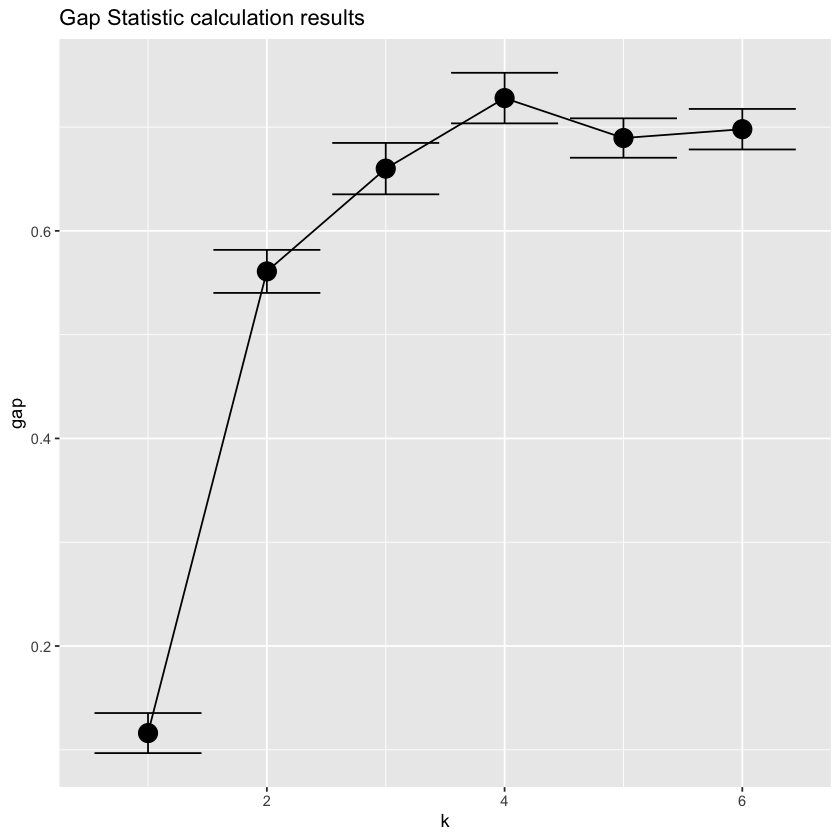

In [10]:
gs = gap_statistic_ordination(exord, "pam1", B = 50, verbose = FALSE)
print(gs, method = "Tibs2001SEmax")

plot_clusgap(gs)